In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plot
%matplotlib inline

In [14]:
dataset = pd.read_csv('cmc.csv')
dataset.head(5)

,wifeAge,wifeEducation,husbandEducation,children,wifeReligion,wifeWorking,husbandOccupation,stdLiving,mediaExposure,contraceptiveMethod
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [15]:
y = dataset['contraceptiveMethod'].values

dataset = dataset.drop(['contraceptiveMethod'], axis=1)
X = dataset.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

feat_labels = dataset.columns[:]

In [16]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f],importances[indices[f]]))

 1) wifeAge                        0.349325
 2) wifeEducation                  0.227783
 3) husbandEducation               0.089501
 4) children                       0.089312
 5) wifeReligion                   0.082592
 6) wifeWorking                    0.065574
 7) husbandOccupation              0.044941
 8) stdLiving                      0.034456
 9) mediaExposure                  0.016516


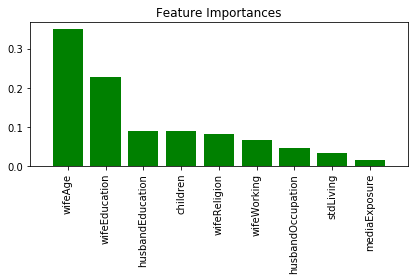

In [17]:
title('Feature Importances')
bar(range(X_train.shape[1]), importances[indices], 
                     color='green', align='center')
xticks(range(X_train.shape[1]),
feat_labels, rotation=90)
xlim([-1, X_train.shape[1]])
tight_layout()
show()